# Project: Wrangling and Analyze Data

# Project 2 - Data Wrangling (WeRateDogs)

## Introduction
The project entails organiwrangling the tweet history of the Twitter user @dog rates, alias WeRateDogs. WeRate Dogs is a twitter account that ranks dogs based on comments made about them and is typically rated over 10.

The project covers the Data Analysis process, but focused mainly on Data wrangling which includes the following four(4) stages:
1. <a href="#gathering">Gathering Data</a>
2. <a href="#assesing">Assessing Data</a>
3. <a href="#cleaning">Cleaning Data</a>
4. <a href="#storing">Storing Data.</a>


Each of the stages above would be covered together with data analysis and visualization.


<a id="gathering"></a> 
# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [76]:
# Load necessary libraries required for the data analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import json
import requests
#import plotly.express as px


%matplotlib inline

In [77]:
# Loading the twitter archive dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#Viewing the first 5 rows of the data 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [78]:
image_folder = 'Image_prediction'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_data = requests.get(url)

with open(os.path.join(image_folder, url.split('/')[-1]), mode='wb') as f:
    f.write(image_data.content)

In [79]:
# Loading the 2nd data as a dataframe and viewing the top 5 rows

image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [80]:
 #access the data downloaded from the Udacity Class which was provided by an instructor
file_path = "tweet-json.txt"

df_list = []
count = []
with open(file_path, mode= "r", encoding='utf-8') as file:
    for line in file.readlines():
        df_dict = {}
        for key in ["id", "created_at", "retweet_count", "favorite_count"]:
            try:
                df_dict[f"{key}"] = json.loads(line)[f"{key}"]
            except Exception as e:
                continue

        df_list.append(df_dict)
    
tweet_json = pd.DataFrame(df_list)
tweet_json.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774


<a id="assessing"></a> 
## Assessing Data

After loading all three dataset, we can begin anlysis by having an overview of each dataset and identifying any data with quality and tidiness issues using visual and programmatic assessments. According to the project instructions, 8 quality issues and 2 tidiness issues are to be detected and are as follows:   

Now, data from all thre data sources have been read into a data frame. It is now time to start analysis of the data and performing all necessary cleaning. Hence, we begin with the data in "twitter_archive" ...

Data 1 assessment

In [81]:
#Starting withe the twitter archive data
#Viewing the top 10 rows of the data
twitter_archive.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [82]:
#Checking the datatype pf each columns in the dataset together with the size of the data and columna with missing data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
#Programmatic assessment
#Checking for columns with duplicate values
twitter_archive.duplicated().value_counts()

False    2356
dtype: int64

In [84]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [85]:
#Checking the row with the maximum rating denominator
twitter_archive[twitter_archive['rating_denominator'] == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [86]:
#Checking for rating denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [87]:
#Checking all the unique rating numrator in the twitter data
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [88]:
#Having an overview assessment of the text column in the twitter data
twitter_archive.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [89]:

#Checking the quality of the data in the text column
text_with_error = []
for index, row in twitter_archive.iterrows():
    for word in ["At first", "thought", "wrong", "instead", "sorry", "mistake"]:
        if word in row['text']:
            text_with_error.append(index)
            print(row['text'])

This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8
RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc
RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.co/W86h5dgR6c
This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.co/W86h5dgR6c
At first I thought this wa

In [90]:
#Checks for duplicate names
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
an           7
Toby         7
Daisy        7
Bailey       7
Buddy        7
Oscar        6
Bella        6
Stanley      6
Milo         6
Koda         6
Scout        6
Rusty        6
Jax          6
Leo          6
Dave         6
Jack         6
Chester      5
          ... 
Binky        1
Karma        1
Amélie       1
Jazzy        1
Blue         1
Crumpet      1
Carbon       1
Dug          1
Bayley       1
Bruno        1
Malikai      1
Brandy       1
Hall         1
Clarkus      1
Barry        1
Brudge       1
Iroh         1
Chaz         1
Craig        1
Bilbo        1
Hamrick      1
Tycho        1
Augie        1
Herb         1
Fido         1
Samsom       1
Timber       1
Aja          1
Lenox        1
Ivar         1
Name: name, Length: 957, dtype: int64

The result sbove shows that "None" is identified as name which is supposed to be missing values, it also has 'a' as a name which must have been errors and some names like charlie, oliver, lucy, cooper, e.t.c are duplicated but we will have to confirm they are not different people.

In [91]:
#Checking one of the duplicated rows
twitter_archive[twitter_archive['name'] == 'Charlie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Charlie. He fell asleep...,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,12,10,Charlie,None,None,None,None
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None


In [92]:
#Checking the duplicated rows
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


Data 2 assessment

In [93]:
#Viewing the top 10 rows of the image prediction data with visual assessment
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [94]:
#Checking the size of the data, the columns with missing values and the data type of each column
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
#inspecting the Popular dog type
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
chow                               20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

The three most popular dog breeds are Labrador_retriever, golden_retriever and Cardigan 

**Data 3 Assessment**

In [96]:
#An overview o f first 10 rows of the data

tweet_json.head(10)

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774
5,Sat Jul 29 00:08:17 +0000 2017,20562,891087950875897856,3261
6,Fri Jul 28 16:27:12 +0000 2017,12041,890971913173991426,2158
7,Fri Jul 28 00:22:40 +0000 2017,56848,890729181411237888,16716
8,Thu Jul 27 16:25:51 +0000 2017,28226,890609185150312448,4429
9,Wed Jul 26 15:59:51 +0000 2017,32467,890240255349198849,7711


In [97]:
#Checking the size of the data, the columns with missing values and the data type of each column
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [98]:
tweet_json.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


### Quality issues
1. In the twitter archive data, the column named "source" contains HTML tags.

2. In the image prediciton dataset, the following columns names; p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, are not descriptive enough

3. In the twitter archive dataset, only 78 rows out of 2356 rows in_reply_to_status_id  and in_reply_to_user_id columns only contained values, which shows that over 95% of data in these columns are missing values. Also there are only 181 rows with data in the retweeted_status_id and retweeted_status_user_id rows 

4. The column "id_str" has a different description from other dataset which is the common column among all the dataset, will be a challenge when the datasets is to be merged.

5. The datestamp column in the twitter archive dataset has its datatype to be object as opposed datetime.

6. The following columns; 'doggo', 'floofer', 'pupper', 'puppo', 'name'   have  missing values  represented with "None" and not NAN 

7. The tweet_id datatype shows integer, but should be an object.

8. The  rating_denominator column has values greater than 10 and has a maximum value of 170  

9. The 'texts' column in the twitter archive dataset contains multiple information, such as urls and ratings.

10. The 'name' column has 'a' as a name in 55 rows

### Tidiness issues
1. The twitter archive dataset and twitter json dataset should have been a single dataset 

2. In image prediction, there is no consistency in the data format in columns;p1, p2, p3. Some pf the data in these columns start with capitalized letter while  some are in lowercase all through.

3. The column representing texts contains multiple information such as urls and even ratings.


<a id="cleaning"></a> 
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [99]:
# Make copies of original pieces of data

clean_twitter_archive = twitter_archive.copy()
clean_image_prediction = image_prediction.copy()
clean_tweet_json = tweet_json.copy()

### Issue #1:  Missing values not properly represented 

#### Define: Replace the "None" values with 'Nan' in twitter_archive dataset



#### Code

In [100]:
#Replacing the 'None' values in the twitter archive dataset
clean_twitter_archive.replace(to_replace= "None", value= np.nan, inplace= True)

#### Test

In [101]:
#Confirming the 'none' values have been replaced selecting a row in the dataset
clean_twitter_archive.query("puppo == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


As we can see there is no row with the 'None' value anymore

In [102]:
#Confirmation that the 'None' values are now been replaced with 'Nan'
clean_twitter_archive.query("in_reply_to_status_id == 'Nan'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


### Issue #2: Retweets are in the original tweet and are not required in this data analysis

#### Define: Remove all retweet in the following columns in the twitter archive dataset: 'retweeted_status_id', 'retweeted_status_user_id' and  'retweeted_status_timestamp'

#### Code

In [103]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive["retweeted_status_id"].isna()]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive["retweeted_status_timestamp"].isna()]
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive["retweeted_status_user_id"].isna()]

#### Test

In [104]:
#The retweeted_status_timestamp before removing the retweet
twitter_archive["retweeted_status_timestamp"].isna().value_counts()

True     2175
False     181
Name: retweeted_status_timestamp, dtype: int64

In [105]:
#The retweeted_status_timestamp after removing the retweet
clean_twitter_archive["retweeted_status_timestamp"].isna().value_counts()

True    2175
Name: retweeted_status_timestamp, dtype: int64

### Issue #3: 
High number of  missing  values in the folowing columns of the twitter_archive dataset: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' 

#### Define: Remove the abov listed columns if the missing values are greater than 60%

#### Code

In [106]:
#Checking the percentage of missing values in each columns
# checking how many percent of data is missing
print(f"in_reply_to_status_id: {clean_twitter_archive['in_reply_to_status_id'].isna().sum() / clean_twitter_archive.shape[0] * 100}")
print(f"in_reply_to_user_id: {clean_twitter_archive['in_reply_to_user_id'].isna().sum() / clean_twitter_archive.shape[0] * 100}")
print(f"retweeted_status_id: {clean_twitter_archive['retweeted_status_id'].isna().sum() / clean_twitter_archive.shape[0] * 100}")
print(f"retweeted_status_user_id: {clean_twitter_archive['retweeted_status_user_id'].isna().sum() / clean_twitter_archive.shape[0] * 100}")
print(f"retweeted_status_timestamp: {clean_twitter_archive['retweeted_status_timestamp'].isna().sum() / clean_twitter_archive.shape[0] * 100}")

in_reply_to_status_id: 96.41379310344827
in_reply_to_user_id: 96.41379310344827
retweeted_status_id: 100.0
retweeted_status_user_id: 100.0
retweeted_status_timestamp: 100.0


From the output above, we can see that the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns have over 96% of missing values while the 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' columns have their entire rows filled with missing values.

Since the values of missing values are over 60%, all of these columns will therefore be dropped


In [107]:
clean_twitter_archive.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                             "retweeted_status_id", "retweeted_status_user_id",
                            "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [108]:
#Confirming that the clolumns ("in_reply_to_status_id", "in_reply_to_user_id", 
# "retweeted_status_id", "retweeted_status_user_id""retweeted_status_timestamp") have been dropped

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #4: Incorrect data types in the following columns: issue

- twitter_archive dataset: Timestamp column not in datetime type
- twitter_archive dataset: tweet_id has its data type in int64 instead of object (string)
- tweet_json dataset: The column 'created_at' indicates when tweets were created which is a datetime column but its data type is object.
- tweet_json dataset: The 'id' column should have its data type as object not int64
- image_prediction dataset: The 'tweet_id' column should have its data type as object not int64


#### Define

- Convert the 'timestamp' column in twitter_archive dataset from object type to datetime type
- Convert 'tweet_id' column in twitter_archive dataset from int64 data type to object
- Convert 'id'column  in tweet_json dataset from int64 data type to object
- Convert ;tweet_id' in image_prediction dataset from int64 data type to object 

In [109]:
clean_tweet_json.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,891327558926688256,9774


#### Code



In [110]:
# Convert the 'timestamp' column in twitter_archive dataset from object type to datetime type
clean_twitter_archive["timestamp"] = pd.to_datetime(clean_twitter_archive["timestamp"])

# Convert tweet_id in twitter_enhanced table from int64 data type to object (string)
clean_twitter_archive["tweet_id"] = clean_twitter_archive["tweet_id"].astype("str")


# Convert id in tweet_json table from int64 data type to object (string)
clean_tweet_json["id"] = clean_tweet_json["id"].astype("str")

# Convert created_at in tweet_json table from object type to datetime type
clean_tweet_json["created_at"] = pd.to_datetime(clean_tweet_json["created_at"])

# Convert tweet_id in image_prediction table from int64 data type to object (string)
clean_image_prediction["tweet_id"] = clean_image_prediction["tweet_id"].astype("str")



#### Test

In [111]:
#Checking the data type of all the columns in tweet_json dataset
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
id                2354 non-null object
retweet_count     2354 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.6+ KB


In [112]:
##Checking the data type of all the columns in twitter_archive dataset
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [113]:
#Checking the data type of all the columns in twitter_archive dataset

clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5: HTML tags in twitter_archive data



#### Define

- Remove all HTML tags in source of twitter_enhanced table

#### Code

In [114]:
# Removing the html tags which is ">" and ensuring there are no spaces left and right in the "source"
#column
clean_twitter_archive["source"] = clean_twitter_archive["source"].str.strip(). \
apply(lambda x: x[x.index(">") +1 : x.index("</")])

#### Test

In [115]:
#'Source' column in twitter_archive dataset before cleaning that contains html tags
twitter_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [116]:
#'Source' column in twitter_archive dataset after cleaning that contains html tags
clean_twitter_archive["source"].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Some column names are poorly descriptive in the image_prediction dataset

Column such as: p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### Define
- Reanme all the columns that are poorly described in the image_prediction dataset

In [117]:
# renaming columns
col_new_names = {"img_num": "image_count", "p1": "first_prediction",
                                       "p1_conf": "first_confidence_level", "p1_dog": "first_prediction_is_dog",
                                       "p2": "second_prediction", "p2_conf": "second_confidence_level", 
                                       "p2_dog": "second_prediction_is_dog", "p3": "third_prediction", "p3_conf": "third_confidence_level", 
                                       "p3_dog": "third_prediction_is_dog"}

clean_image_prediction.rename(columns=col_new_names, inplace=True)

#### Test

In [118]:
#Checking the column names 
clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                    2075 non-null object
jpg_url                     2075 non-null object
image_count                 2075 non-null int64
first_prediction            2075 non-null object
first_confidence_level      2075 non-null float64
first_prediction_is_dog     2075 non-null bool
second_prediction           2075 non-null object
second_confidence_level     2075 non-null float64
second_prediction_is_dog    2075 non-null bool
third_prediction            2075 non-null object
third_confidence_level      2075 non-null float64
third_prediction_is_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [119]:
clean_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'image_count', 'first_prediction',
       'first_confidence_level', 'first_prediction_is_dog',
       'second_prediction', 'second_confidence_level',
       'second_prediction_is_dog', 'third_prediction',
       'third_confidence_level', 'third_prediction_is_dog'],
      dtype='object')

### Issue #7:  Different data format in some columns of the image_prediction dataset 

Columns like p1, p2, p3 have different data format in some rows, some are capitalized while some are in lowercase

#### Define
- Change data format of the following columns in the image_prediction dataset to lowercase:
'p1' (renamed to 'first_prediction'), 'p2' (renamed 'second_prediction'), 'p3' (now 'third_prediction') 


#### Code

In [120]:
#Chcking the data format in the aforementioned columns 
clean_image_prediction["first_prediction"].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [121]:
#Chcking the data format in the aforementioned columns 
clean_image_prediction["second_prediction"].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
chow                               20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [122]:
#Chcking the data format in the aforementioned columns 
clean_image_prediction["third_prediction"].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [123]:
#Changing the data format in the first, second, and third prediction columns
for i in ["first_prediction", "second_prediction", "third_prediction"]:
    clean_image_prediction[f"{i}"] = clean_image_prediction[f"{i}"].apply(lambda x: x.lower())

#### Test

In [124]:
#Confirming that the data format has been changed successfully in one of the columns
clean_image_prediction["first_prediction"].value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
siberian_husky                20
staffordshire_bullterrier     20
german_shepherd               20
web_site                      19
cardigan                      19
teddy                         18
beagle                        18
maltese_dog                   18
shetland_sheepdog             18
eskimo_dog                    18
shih-tzu                      17
rottweiler                    17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        16
          

### Issue 8: Different  column names

The tweet_id column in twitter_archive has different column description in the tweet_json dataset and will make it hard to merge the datasets

### Define

- Change the "id" column in the tweet_json dataset to "tweet_id"

#### Code

In [125]:
# checking the tweet_id column in the twitter_archive dataset
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [126]:
#checking the tweet_id column in the tweet_json dataset
clean_tweet_json.columns

Index(['created_at', 'favorite_count', 'id', 'retweet_count'], dtype='object')

In [127]:
#checking the tweet_id column in the image_prediction dataset
clean_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'image_count', 'first_prediction',
       'first_confidence_level', 'first_prediction_is_dog',
       'second_prediction', 'second_confidence_level',
       'second_prediction_is_dog', 'third_prediction',
       'third_confidence_level', 'third_prediction_is_dog'],
      dtype='object')

In [128]:
# Rename the specified column so that it is uniform with other two data parts

clean_tweet_json.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

### Test

In [129]:
#Confirming that the column name has been changed successfully
clean_tweet_json.columns

Index(['created_at', 'favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

## Tidiness

### Issue #9: The tweet_json dataset and image_prediction dataset contained information about tweets information and should be merged with twitter_archive dataset

#### Define

- All the three dataset will be merged together as on dataset

#### Code

In [130]:
# Firstly, merge the twitter_archive and tweet_json
clean_twitter_archive = clean_twitter_archive.merge(clean_tweet_json, how="left", on="tweet_id")

In [131]:
#Secondly, merged the new twitter_archive dataset that has been firstly merged with the tweet_json dataset to 
#image_prediction dataset

clean_twitter_archive = clean_twitter_archive.merge(clean_image_prediction, how="left", on="tweet_id")

#### Test


In [132]:
clean_twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,image_count,first_prediction,first_confidence_level,first_prediction_is_dog,second_prediction,second_confidence_level,second_prediction_is_dog,third_prediction,third_confidence_level,third_prediction_is_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [133]:
#Ensuring that no column is duplicated
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'created_at', 'favorite_count', 'retweet_count',
       'jpg_url', 'image_count', 'first_prediction', 'first_confidence_level',
       'first_prediction_is_dog', 'second_prediction',
       'second_confidence_level', 'second_prediction_is_dog',
       'third_prediction', 'third_confidence_level',
       'third_prediction_is_dog'],
      dtype='object')

### Issue #10 : Dupliacted columns after merging

In the merged twitter_archive dataset, the "created_at" columns from the tweet_json dataset is duplicated in the twitter_archive dataset as 'Timestamp'

#### Define

- Delete the duplicated column in the twitter_archive dataset

#### Code

In [134]:
#Deleting the "created_at" column that was duplicated in the twitter_archive dataset
clean_twitter_archive.drop(columns=['created_at'], inplace=True)

#### Test

In [135]:
#Confirming the duplicated column hs been deleted 
clean_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'image_count', 'first_prediction', 'first_confidence_level',
       'first_prediction_is_dog', 'second_prediction',
       'second_confidence_level', 'second_prediction_is_dog',
       'third_prediction', 'third_confidence_level',
       'third_prediction_is_dog'],
      dtype='object')

### Issue #11: The different dog types are in a different columns 

- ('doggo', 'floofer', 'pupper' and 'puppo')

####  Define 
- Melt the dataset to form a single column that contains the values of each dog stage and drop the multiple columns afterwards

#### Test

In [136]:
# Melting the twitter_archive dataset  
melted_df = pd.melt(clean_twitter_archive, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'jpg_url',
       'image_count', 'first_prediction', 'first_confidence_level',
       'first_prediction_is_dog', 'second_prediction',
       'second_confidence_level', 'second_prediction_is_dog',
       'third_prediction', 'third_confidence_level',
       'third_prediction_is_dog'],
                  
        var_name='dog_type_label', value_name= "dog_type", value_vars= ['doggo', 'floofer', 'pupper', 'puppo'])

In [137]:
melted_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,first_confidence_level,first_prediction_is_dog,second_prediction,second_confidence_level,second_prediction_is_dog,third_prediction,third_confidence_level,third_prediction_is_dog,dog_type_label,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,doggo,NaN


In [138]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 23 columns):
tweet_id                    8700 non-null object
timestamp                   8700 non-null datetime64[ns]
source                      8700 non-null object
text                        8700 non-null object
expanded_urls               8468 non-null object
rating_numerator            8700 non-null int64
rating_denominator          8700 non-null int64
name                        5980 non-null object
retweet_count               8700 non-null int64
favorite_count              8700 non-null int64
jpg_url                     7976 non-null object
image_count                 7976 non-null float64
first_prediction            7976 non-null object
first_confidence_level      7976 non-null float64
first_prediction_is_dog     7976 non-null object
second_prediction           7976 non-null object
second_confidence_level     7976 non-null float64
second_prediction_is_dog    7976 non-null object
thir

In [139]:
#Creating subsets of  dog_type and the rows with 'None'
dog_types = ["doggo", "floofer", "pupper", "puppo"]
dog_types_without_value = melted_df.query("dog_type != @dog_types")
dog_types_with_value = melted_df.query("dog_type == @dog_types")


#Creating a list of multiple dog types 
dog_type = dog_types_with_value.groupby('tweet_id')['dog_type'].\
                                                    apply(lambda x: list(x)).reset_index(drop=True)

 
#Separate rows that are duplicated
dog_types_with_value = dog_types_with_value.drop_duplicates(subset="tweet_id").\
                                                    sort_values("tweet_id").reset_index(drop=True)
dog_types_with_value["dog_type"] = dog_type
dog_types_with_value.reset_index(drop=True, inplace=True)


#Extracting the tweet id of the subsets
tweetid_type_with_value = dog_types_with_value.tweet_id.values
tweetid_type_without_value = dog_types_without_value.tweet_id.values



#Dropping rows duplicated rows due to melting
for i, row in dog_types_without_value.iterrows():
    
    if row["tweet_id"] in tweetid_type_with_value:
        dog_types_without_value.drop(index=i, inplace=True)

#Dropping rows with duplicates tweet_id from the subset with 'None'

dog_types_without_value.drop_duplicates(subset ="tweet_id", inplace = True)

#Merge subsets data
clean_twitter_archive = pd.concat([dog_types_with_value, dog_types_without_value])
clean_twitter_archive.drop(columns="dog_type_label", inplace=True)

#Resetting the index and deleting the old index
clean_twitter_archive.reset_index(drop=True, inplace=True)


print(f"Size of data is: {clean_twitter_archive.shape}")

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Size of data is: (2175, 22)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Test

In [140]:
clean_twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,first_prediction,first_confidence_level,first_prediction_is_dog,second_prediction,second_confidence_level,second_prediction_is_dog,third_prediction,third_confidence_level,third_prediction_is_dog,dog_type
0,672160042234327040,2015-12-02 21:06:56,Twitter for iPhone,This is Bubba. He's a Titted Peebles Aorta. Ev...,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,395,918,...,pug,0.561027,True,french_bulldog,0.222114,True,labrador_retriever,0.065456,True,[pupper]
1,672205392827572224,2015-12-03 00:07:09,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,1270,2414,...,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True,[pupper]
2,672254177670729728,2015-12-03 03:21:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,800,1515,...,pug,0.979487,True,french_bulldog,0.016850,True,norwegian_elkhound,0.001618,True,[pupper]
3,672481316919734272,2015-12-03 18:23:34,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,137,757,...,border_collie,0.599454,True,collie,0.106227,True,shetland_sheepdog,0.094465,True,[pupper]
4,672594978741354496,2015-12-04 01:55:13,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,661,1411,...,great_pyrenees,0.755945,True,old_english_sheepdog,0.082337,True,afghan_hound,0.027037,True,[pupper]


<a id="storing"></a> 
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [141]:
clean_twitter_archive.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

***Questions***
1. Which of the dog types has the highest number of favourites
2. What day of the week has the highest number of tweets
3. What is the top 5 dogs predicted


**Question 1**
- Which of the dog types has the highest number of favourites

In [142]:
twitter_df = pd.read_csv("twitter_archive_master.csv")

In [155]:
favourite = twitter_df.favorite_count.nlargest(1).astype("int64").values[0]
twitter_df.query("favorite_count == @favourite")["dog_type"].apply(lambda x: x.strip("['']"))

290    puppo
Name: dog_type, dtype: object

In [144]:
#Getting the id of the dog type with highest favourite
twitter_df.query("favorite_count == @favourite")["tweet_id"]

290    822872901745569793
Name: tweet_id, dtype: int64

The dog with the highest favourite is 'puppo' as we can see from the above result

**Question 2**
- What day of the week has the highest number of tweets

In [145]:
#Creating a function to split the datetime column into year, month, and day
def split_date(df, datetime_column, new_datetime_column= "any", drop=False):
    '''
    This function will split a datetime coloumn into year, month, 
    week_day and hour and will also convert the column if it is not in datetime yet.
    
    parameter: df: DataFrame
    parameter: datetime_column: string
    parameter: new_datetime_column: Optional | string
    parameter: drop: bool
    '''
    
    # For any new column
    if new_datetime_column != "any":
        #Try to convert feature to datetime
        try:
            df[f"{new_datetime_column}"] = pd.to_datetime(df[f"{datetime_column}"])
            
            #Split the columns
            df[f"year_{new_datetime_column}"] = df[f"{new_datetime_column}"].apply(lambda x : x.year)
            df[f"month_{new_datetime_column}"] = df[f"{new_datetime_column}"].apply(lambda x : x.month)
            df[f"weekday_{new_datetime_column}"] = df[f"{new_datetime_column}"].apply(lambda x : x.day_name())
            df[f"hour_{new_datetime_column}"] = df[f"{new_datetime_column}"].apply(lambda x : x.hour)
            
            if drop == True:
                df.drop(columns = f"{datetime_column}", inplace=True)
        except Exception as e:
            print(e)
    else:
        try:
            df[f"{datetime_column}"] = pd.to_datetime(df[f"{datetime_column}"])
            
            # create split columns
            df[f"year_{datetime_column}"] = df[f"{datetime_column}"].apply(lambda x : x.year)
            df[f"month_{datetime_column}"] = df[f"{datetime_column}"].apply(lambda x : x.month)
            df[f"weekday_{datetime_column}"] = df[f"{datetime_column}"].apply(lambda x : x.day_name())
            df[f"hour_{datetime_column}"] = df[f"{datetime_column}"].apply(lambda x : x.hour)
            
        except Exception as e:
            print(e)

In [146]:
#Applying the split date function on the data
split_date(df=twitter_df, datetime_column="timestamp", 
               new_datetime_column= "created", drop=True)

In [147]:
twitter_df["weekday_created"].value_counts()

Monday       357
Tuesday      326
Wednesday    322
Friday       305
Thursday     305
Saturday     284
Sunday       276
Name: weekday_created, dtype: int64

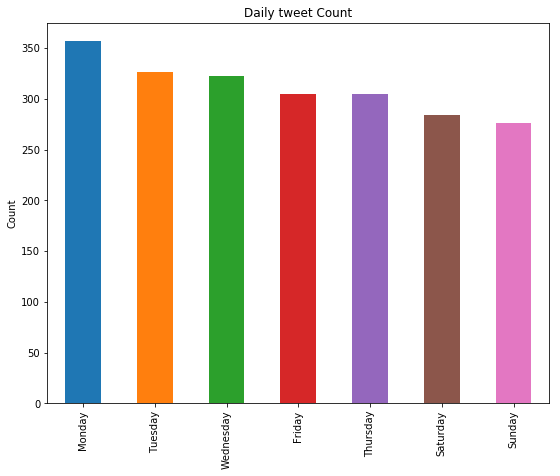

In [148]:
#Visualising the day of the week with highest tweets
twitter_df["weekday_created"].value_counts().plot(kind="bar",  figsize=(9,7))
plt.title("Daily tweet Count")
plt.xlabel("")
plt.ylabel("Count")

plt.savefig("weekday_vis.png");

As displayed above, monday has the highest number of tweets

In [149]:
#Checking for correlation between the columns

twitter_df.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,image_count,first_confidence_level,second_confidence_level,third_confidence_level,year_created,month_created,hour_created
tweet_id,1.000000,0.053589,-0.024052,0.383249,0.629072,0.212854,0.106469,-0.002557,-0.049237,0.878428,-0.290744,0.152875
rating_numerator,0.053589,1.000000,0.150362,0.001144,-0.001888,-0.000684,-0.009049,-0.020724,-0.004173,0.055235,-0.031746,0.034600
rating_denominator,-0.024052,0.150362,1.000000,-0.020657,-0.027437,-0.004094,-0.004240,-0.034964,0.007071,0.002401,-0.039953,-0.029918
retweet_count,0.383249,0.001144,-0.020657,1.000000,0.911732,0.107198,0.054591,-0.018472,-0.044230,0.325324,-0.086351,0.052604
favorite_count,0.629072,-0.001888,-0.027437,0.911732,1.000000,0.137053,0.079727,-0.021680,-0.053752,0.538715,-0.153758,0.056107
image_count,0.212854,-0.000684,-0.004094,0.107198,0.137053,1.000000,0.204406,-0.156773,-0.141409,0.207640,-0.105756,0.030873
first_confidence_level,0.106469,-0.009049,-0.004240,0.054591,0.079727,0.204406,1.000000,-0.509531,-0.707994,0.090377,-0.025886,0.009014
second_confidence_level,-0.002557,-0.020724,-0.034964,-0.018472,-0.021680,-0.156773,-0.509531,1.000000,0.480743,-0.008078,0.011862,0.001155
third_confidence_level,-0.049237,-0.004173,0.007071,-0.044230,-0.053752,-0.141409,-0.707994,0.480743,1.000000,-0.034554,-0.002252,-0.012584
year_created,0.878428,0.055235,0.002401,0.325324,0.538715,0.207640,0.090377,-0.008078,-0.034554,1.000000,-0.711380,0.100914


It is observed that the two columns that are very correlated are "retweet_count" and "favorite_count" with value of 0.9

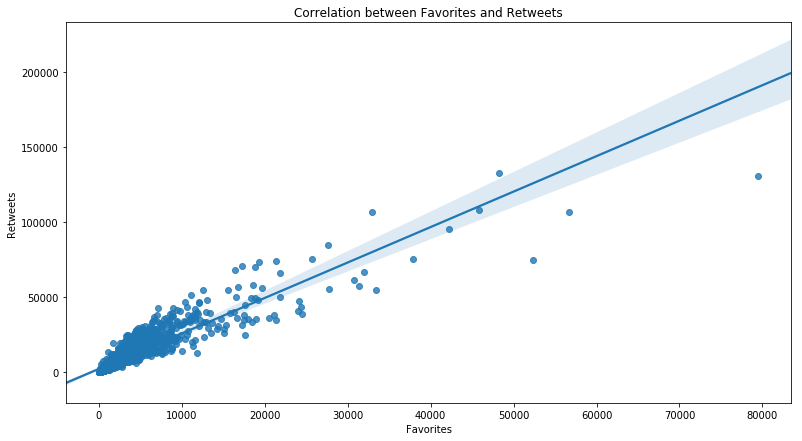

In [150]:
#Visualising the highly correlated columns
plt.figure(figsize=(13,7))
sns.regplot(x=twitter_df.retweet_count, y=twitter_df.favorite_count)
plt.title("Correlation between Favorites and Retweets")
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.savefig("Retweets vs Favorites.png");

### Insights:
1. The dog with the highest favourite is 'puppo'

2. Monday has the highest number of tweets

3. Retweet and favorite are highly correlated